Using Spacy module


In [1]:
import spacy
!pip install spacy-transformers
import spacy_transformers

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.1 which is incompatible.


In [2]:
!pip install https://huggingface.co/spacy/en_core_web_trf/resolve/main/en_core_web_trf-any-py3-none-any.whl



# Importing as module.
import en_core_web_trf
nlp = en_core_web_trf.load()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 3.0 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_trf' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  elif "spacy_git_version" in meta:


NLTK again

In [3]:
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

Testing the above modules on our Dataset

In [4]:
# Importing the required libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math 
import sklearn.metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt
import math 
import sklearn.metrics
from nltk.tree import *
from nltk import word_tokenize, pos_tag, ne_chunk




In [5]:
# Importing the dataset
df = pd.read_excel("/content/output (2) (1) (1).xlsx")

In [ ]:
df.head()

In [7]:
n = df.shape[0]

In [8]:
mod_ans_set = df.iloc[:, 2].values
usr_ans_set = df.iloc[:, 3].values

In [9]:
df.insert(4,"Score_NLTK",np.nan)
df.insert(5,"Score_spacy",np.nan)

In [10]:
df.head()



,S.No,Questions,Model Answer (ChatGPT),User Answer (Web),Score_NLTK,Score_spacy,Actual Score (0-10)
0,1.0,List the advantages of DBMS?,1. Data Integrity: DBMS ensures data accuracy ...,1.Better Data Transferring: Database managemen...,NaN,NaN,7.0
1,2.0,List the database Applications?,1. MySQL 2. Oracle Database 3. Microsoft SQL S...,1.Oracle Database 2.PostgreSQL 3.SQLite 4.File...,NaN,NaN,5.0
2,3.0,Define instances and schemas of database?,Instance: An instance is a copy of the databas...,The overall design of the database is called d...,NaN,NaN,4.0
3,4.0,Discuss Data Independence?,Data independence is the ability of a system t...,Data independence is the ability to modify the...,NaN,NaN,7.0
4,5.0,Explain database Access for applications Programs,Database Access for applications Programs is a...,Database Access means functionality required i...,NaN,NaN,0.0


In [11]:
def spacy_name(text):
  doc = nlp(text)
  named_entities = []
  for entity in doc.ents:
    named_entities.append((entity.text, entity.label_))
  return named_entities


In [12]:
def nltk_name(text):
  tokens = word_tokenize(text)
  pos_tags = pos_tag(tokens)
  named_entities = ne_chunk(pos_tags)
  return named_entities




In [13]:
def compute_score_nltk(a,b):
  entity_user = a.leaves()
  entity_model = b.leaves()
  n = len(entity_model)
  count = 0
  for i in entity_user:
    if(i in entity_model):
      count+=1
      continue
  if(count>n):
    count = 10
  else:
    count = (count/n)*10
  return count

In [20]:
def compute_score_spacy(user,modal):
  n = len(modal)
  n1 = len(user)
  count = 0
  if(n==0):
    count = 10
    return count
  for i in range(n1):
    if(user[i] in modal):
      count+=1
      continue
  count = (count/(n+1))*10
  if(count>10):
    count = 10
  return count

In [15]:
def regex(text):
  text2 = ''
  for i in text:
    if ((ord(i) >= 65 and ord(i) <= 90) or (ord(i) >= 97 and ord(i) <= 122) or ord(i)==32):
      text2+=i
  return text2

In [21]:
for i in range(df.shape[0]):
  modal = df['Model Answer (ChatGPT)'][i]
  user = df['User Answer (Web)'][i]
  modal1 = regex(modal)
  user1 = regex(user)
  modal_entity_nltk = nltk_name(modal1)
  user_entity_nltk = nltk_name(user1)
  score_nltk = compute_score_nltk(user_entity_nltk,modal_entity_nltk)
  df['Score_NLTK'][i] = score_nltk
  modal_entity_spacy = spacy_name(modal)
  user_entity_spacy = spacy_name(user)
  score_spacy = compute_score_spacy(user_entity_spacy,modal_entity_spacy)
  df['Score_spacy'][i] = score_spacy




<ipython-input-21-5094ba80841b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_NLTK'][i] = score_nltk
<ipython-input-21-5094ba80841b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_spacy'][i] = score_spacy


Generating Excel Sheet

In [18]:
df.to_excel("Prepared_Dataset_Scored.xlsx")

Generating Visualizations to compare scores of the spacy model and the NLTK model

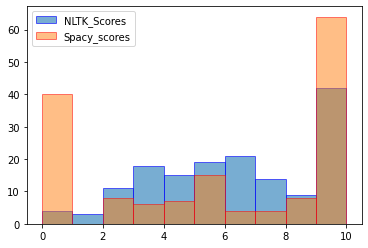

In [22]:
plt.hist(df['Score_NLTK'], label='NLTK_Scores', alpha=0.6, edgecolor='blue')
plt.hist(df['Score_spacy'], label='Spacy_scores', alpha=0.5, edgecolor='red')
plt.legend()
plt.show()

In [ ]:
df.head()

,S.No,Questions,Modal Answer (ChatGPT),User Answer (Web),Score_NLTK,Score_spacy,Actual Score (0-10),Final Score (Calculated)
0,1,List the advantages of DBMS?,1. Data Integrity: DBMS ensures data accuracy ...,1.Better Data Transferring: Database managemen...,10.000000,0.0,NaN,NaN
1,2,List the database Applications?,1. MySQL 2. Oracle Database 3. Microsoft SQL S...,1.Oracle Database 2.PostgreSQL 3.SQLite 4.File...,4.117647,0.0,NaN,NaN
2,3,Define instances and schemas of database?,Instance: An instance is a copy of the databas...,The overall design of the database is called d...,7.230769,0.0,NaN,NaN
3,4,Discuss Data Independence?,Data independence is the ability of a system t...,Data independence is the ability to modify the...,3.857143,0.0,NaN,NaN
4,5,Explain database Access for applications Programs,Database Access for applications Programs is a...,Database Access means functionality required i...,1.744186,0.0,NaN,NaN
